## 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석하기
* 이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 관련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib 에 익숙해져 봅니다.
* https://www.data.go.kr/dataset/15012005/fileData.do
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [1]:
# Window에서는 dir을 사용합니다.
%ls data

seoul-bike-2017.csv
seoul-bike-2018.csv
seoul_bike_station.csv
seoul_municipalities_geo_simple.json
store_201906_01.csv*
store_201906_02.csv*
store_201906_03.csv*
store_201906_04.csv*
전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 평균 분양가격(2019년 8월)_20190917.csv


In [2]:
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
import warnings
warnings.filterwarnings('ignore')

## 필요한 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 한글 폰트 설정하기

In [4]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
# 한글폰트 사용시 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [5]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

## Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [6]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [7]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/store_201906_01.csv')  

## 데이터 불러오기
* 데이터 다운로드 위치 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다.
* 구글드라이브에서 받기 : https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT

In [8]:
# 파일을 불러와 df_store 라는 변수에 담습니다.
df_store = pd.read_csv('data/store_201906_01.csv')
df_store.head(1)

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12   커피점/카페   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
0    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041  NaN   

                도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 선릉로93길 6  135080  6149.0  NaN   1  NaN  127.047883  37.505675  

[1 rows x 39 columns]

## 데이터 크기 보기

In [9]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.

df_store.shape

(565016, 39)

## info 보기

In [10]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
상가업소번호       565016 non-null int64
상호명          565015 non-null object
지점명          75524 non-null object
상권업종대분류코드    565016 non-null object
상권업종대분류명     565016 non-null object
상권업종중분류코드    565016 non-null object
상권업종중분류명     565016 non-null object
상권업종소분류코드    565016 non-null object
상권업종소분류명     565016 non-null object
표준산업분류코드     532064 non-null object
표준산업분류명      532064 non-null object
시도코드         565016 non-null int64
시도명          565016 non-null object
시군구코드        565016 non-null int64
시군구명         565016 non-null object
행정동코드        565016 non-null int64
행정동명         565016 non-null object
법정동코드        565016 non-null int64
법정동명         565016 non-null object
지번코드         565016 non-null int64
대지구분코드       565016 non-null int64
대지구분명        565016 non-null object
지번본번지        565016 non-null int64
지번부번지        467893 non-null float64
지번주소         565016 non-null obje

## 결측치 보기

In [11]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
df_store_null = df_store.isnull().sum()
df_store_null.sort_values()

상가업소번호            0
구우편번호             0
도로명주소             0
건물관리번호            0
건물본번지             0
도로명               0
도로명코드             0
지번주소              0
지번본번지             0
대지구분명             0
대지구분코드            0
경도                0
법정동명              0
법정동코드             0
행정동명              0
지번코드              0
시군구명              0
상권업종대분류코드         0
행정동코드             0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종대분류명          0
시도코드              0
시도명               0
시군구코드             0
상권업종소분류명          0
위도                0
상호명               1
신우편번호             9
표준산업분류코드      32952
표준산업분류명       32952
지번부번지         97123
층정보          220463
건물명          303808
호정보          481880
지점명          489492
건물부번지        494164
동정보          514802
dtype: int64

## 사용하지 않는 컬럼 제거하기

In [12]:
# 사용할 컬럼만 따로 불러와서 작업을 할 수도 있지만 사용하지 않는 컬럼을 제거하는 방법도 있습니다.
# 판다스에서는 drop 기능을 사용해서 사용하지 않는 컬럼을 삭제할 수 있습니다.
# 삭제할 컬럼을 drop_columns 라는 변수에 리스트 형태로 담아보도록 합니다.
drop_columns = ["상권업종중분류코드", "상권업종소분류코드", 
                "건물관리번호", "표준산업분류코드", "표준산업분류명", 
                "지번부번지", "층정보", "건물명", "호정보", 
                "지점명", "건물부번지", "동정보"]

In [13]:
# drop를 사용해 사용하지 않는 컬럼을 제거합니다.
# 컬럼을 제거하기 전과 제거 후에 shape 를 통해 컬럼의 수가 달라졌는지 확인합니다.
print(df_store.shape)
df_store.drop(drop_columns, axis=1)
print(df_store.shape)

(565016, 39)
(565016, 39)


## 일부 컬럼만 보기

In [14]:
# '상권업종대분류명'만 가지고 옵니다.
df_store['상권업종대분류명'].head()

0       음식
1       음식
2       음식
3       음식
4    생활서비스
Name: 상권업종대분류명, dtype: object

In [15]:
# '상권업종소분류명'만 가지고 옵니다.
df_store['상권업종소분류명'].head()

0    커피전문점/카페/다방
1          호프/맥주
2          토스트전문
3          호프/맥주
4     사우나/증기탕/온천
Name: 상권업종소분류명, dtype: object

In [16]:
# '상권업종대분류명', '상권업종소분류명' 두 개의 컬럼을 가져옵니다.
# 2개 이상의 컬럼을 가져올 때는 리스트 형태의 데이터로 묶어서 사용해야 합니다.
df_store[['상권업종대분류명', '상권업종소분류명']].head()

상권업종대분류명     상권업종소분류명
0       음식  커피전문점/카페/다방
1       음식        호프/맥주
2       음식        토스트전문
3       음식        호프/맥주
4    생활서비스   사우나/증기탕/온천

In [17]:
# columns 를 사용하면 데이터프레임의 컬럼명만 가져옵니다.
df_store.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [18]:
# 컬럼이 많은 편입니다. 모든 컬럼을 다 사용하지 않기 때문에 일부 컬럼만 가져옵니다.
df_columns = ['상가업소번호', '상호명', '지점명', '상권업종대분류명', 
       '상권업종중분류명',  '상권업종소분류명', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동명', '법정동명', '지번코드',
       '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명주소', 
       '구우편번호', '신우편번호', '경도', '위도']
df_store[df_columns].head(1)

상가업소번호            상호명         지점명 상권업종대분류명 상권업종중분류명     상권업종소분류명  \
0  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방   

    표준산업분류명  시도코드    시도명  시군구코드  ...                 지번코드 대지구분명 지번본번지  지번부번지  \
0  비알콜 음료점업    11  서울특별시  11680  ...  1168010100206960042    대지   696   42.0   

                   지번주소               도로명주소   구우편번호   신우편번호          경도  \
0  서울특별시 강남구 역삼동 696-42  서울특별시 강남구 선릉로93길 6  135080  6149.0  127.047883   

          위도  
0  37.505675  

[1 rows x 23 columns]

## 일부 텍스트가 들어가는 데이터만 가져오기

In [19]:
# str.contains를 사용하면 특정 단어가 포함된 데이터를 가져옵니다.
# 여기에서는 '상권업종소분류명'으로 '커피'가 들어가는 단어만 가져옵니다.
coffee = df_store[df_store['상권업종소분류명'].str.contains('커피')]
coffee.shape

(23103, 39)

In [20]:
# 상호명으로 봤을 때 커피점의 수를 출력해 봅니다.
# unique 를 사용하면 중복을 제거한 상호명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.
coffee['상호명'].unique().shape

(15205,)

In [21]:
# nunique 를 사용하면 중복을 제거한 상호명의 갯수를 세어줍니다.
coffee['상호명'].nunique()

15205

## 특정 상호만 가져오기
* 여기에서는 스타벅스 상호를 가져와서 실습합니다.
* 위에서 커피를 가져왔던 내용을 활용해 봅니다.

In [22]:
# 중복을 제거한 스타벅스의 상호명만 가져옵니다.
# 스타벅스라는 브랜드명을 어떻게 추출해야 할지 알아보기 위함입니다.
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스', '스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스연세백양로점',
       '스타벅스가락시장역점', '스타벅스외대점', '스타벅스석촌역', '스타벅스명지대점', '스타벅스압구정로데오역',
       '스타벅스연대동문', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스신림점', '스타벅스서울대입구역점',
       '스타벅스광장점', '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점',
       '스타벅스삼선교점', '스타벅스종각점', '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워',
       '스타벅스방배카페입구', '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스용산역점', '스타벅스마포일진빌딩점',
       '스타벅스천호로데오점', '스타벅스중계역점', '스타벅스명동메트로', '스타벅스마포아크로타워점',
       '스타벅스남부터미널2점', '스타벅스구로디지털로점', '스타벅스중랑구청점', '스타벅스종로관수점', '스타벅스논현힐탑',
       '스타벅스부산서면', '스타벅스삼성도심공항점', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스선릉로점',
       '스타벅스명동역', '스타벅스미아역점', '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2',
       '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점', '스타벅스을지로입구', '스타벅스교대역점',
       '스타벅스서울중앙우체국점', '스타벅스구로하이엔드점', '스타벅스남산스테이트', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스조선호텔후문', '스타벅스명일이마트점', '스타벅스커리학동사거리점', '스타벅스서울교대점',
       '스타벅스강북구청사거리점', '스타벅스청

## 시도별 데이터 보기
* 시도와 구군 데이터가 있습니다. 어느 시도의 데이터가 있는지 봅니다.

In [23]:
# 시도에 결측치가 있는지 다시 봅니다.
coffee['시도명'].isnull().sum()

0

In [24]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 다운로드 받은 공공데이터와 같은 폴더에 있는 다른 파일을 참고해 주세요.

coffee['시도명'].value_counts()

서울특별시    18341
부산광역시     4762
Name: 시도명, dtype: int64

In [25]:
# 시군구명에서 unique 한 값을 봅니다.
coffee['시군구명'].unique()

array(['강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '마포구', '종로구', '도봉구',
       '북구', '남구', '기장군', '광진구', '서대문구', '은평구', '해운대구', '양천구', '용산구',
       '관악구', '성동구', '사상구', '금천구', '송파구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [26]:
# coffee 라고 만들어 준 데이터 프레임을 통해 "상권업종중분류명"을 value_counts()로 요약해 봅니다.
coffee['상권업종중분류명'].value_counts()

커피점/카페    23103
Name: 상권업종중분류명, dtype: int64

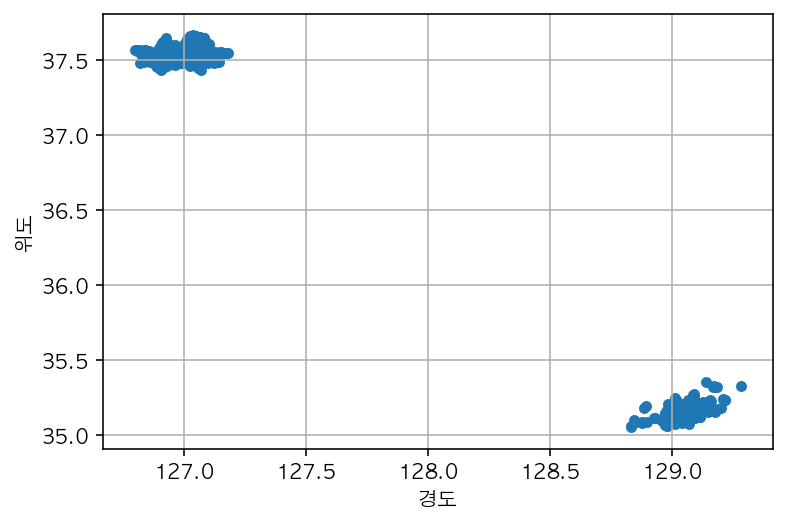

In [27]:
# 경도와 위도가 있습니다. 데이터를 그려봅니다.
df_store[:1000].plot.scatter(x="경도", y="위도", grid="True")

## 서울만 따로 보기

In [28]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df_store.loc[df_store['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(401071, 39)

In [29]:
# 서울 데이터의 결측치를 봅니다. 위와 동일하게 isnull() 과 sum() 을 사용해서 결측치의 수를 더할 수 있습니다.
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          344270
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23587
표준산업분류명       23587
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         75924
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        354031
건물관리번호            0
건물명          205736
도로명주소             0
구우편번호             0
신우편번호             2
동정보          369770
층정보          125634
호정보          343797
경도                0
위도                0
dtype: int64

In [30]:
# 서울에 있는 '상권업종대분류명'을 그룹화 하여 갯수를 세어봅니다.
df_seoul['상권업종대분류명'].value_counts()

음식          131687
소매          124782
생활서비스        64344
학문/교육        31247
의료           18826
부동산          15430
관광/여가/오락     11578
숙박            3047
스포츠            130
Name: 상권업종대분류명, dtype: int64

In [31]:
# describe 를 하게 되면 요약된 데이터 정보를 볼 수 있습니다.
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   401071  56801    401071   401071    401071   401071    401071   
unique  274470  20473         9        9        94       94       696   
top      점프셈교실    강남점         Q       음식       Q01       한식    Q01A01   
freq      1743    494    131687   131687     41243    41243     27110   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...    법정동명   대지구분명  \
count      401071   377484   377484  ...  401071  401071   
unique        696      211      211  ...     465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...     역삼동      대지   
freq        27110    50833    50833  ...   11866  400708   

                        지번주소             도로명                     건물관리번호  \
count                 401071          401071                     401071   
unique                127572           11941                     128106   
top     서울특별시 종로구 종로6가 262-1  서울특별시 서초구 신반포로  1111016400102700003012054   
freq                     978            3531                       1010   

            건물명             도로명주소    동정보     층정보    호정보  
count    195335            401071  31301  275437  57274  
unique    26219            127287    975     139   2680  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1020               997   5457  178422   6479  

[4 rows x 23 columns]

In [32]:
# 위도와 경도만 describe 를 통해 요약해 봅니다.
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  401071.000000  401071.000000
mean       37.544965     126.996983
std         0.048108       0.080574
min        37.434081     126.768169
25%        37.505431     126.928061
50%        37.541162     127.012732
75%        37.571921     127.057331
max        37.692398     127.182588

### 분류별 countplot 그리기

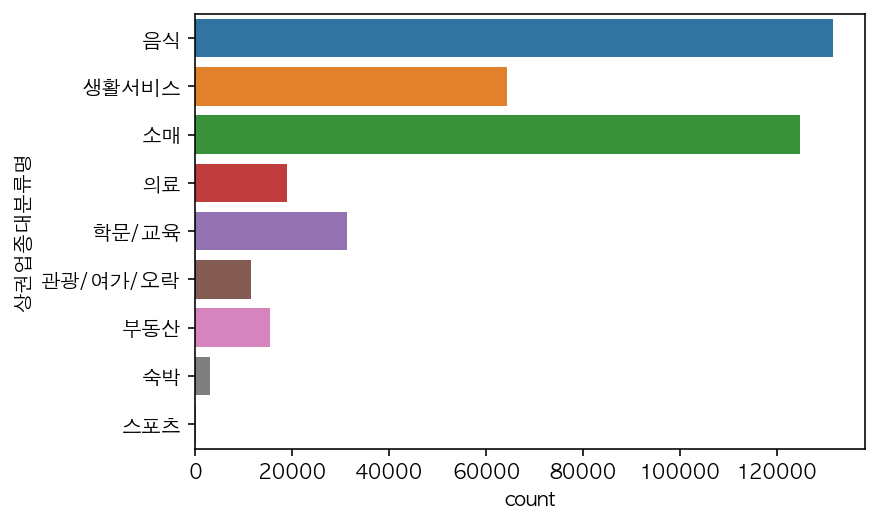

In [33]:
# 상권업종대분류명 으로 seaborn 의 countplot 을 사용해 시각화를 합니다.
# seaborn 의 countplot는 같은 데이터를 그룹화하여 더해준 값을 그래프로 표현합니다.
sns.countplot(data=df_seoul, y="상권업종대분류명")

In [34]:
# "상권업종대분류명"을 시각화하면 "음식" 업종이 가장 많습니다.
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(131687, 39)

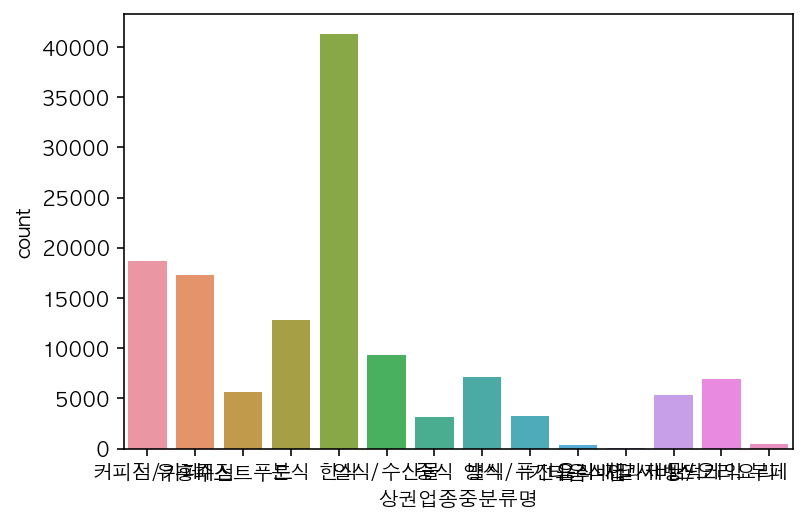

In [35]:
# countplot 을 그리면 해당 카테코리에 해당되는 데이터의 수를 카운트해서 시각화 합니다.
sns.countplot(data=df_food, x="상권업종중분류명")

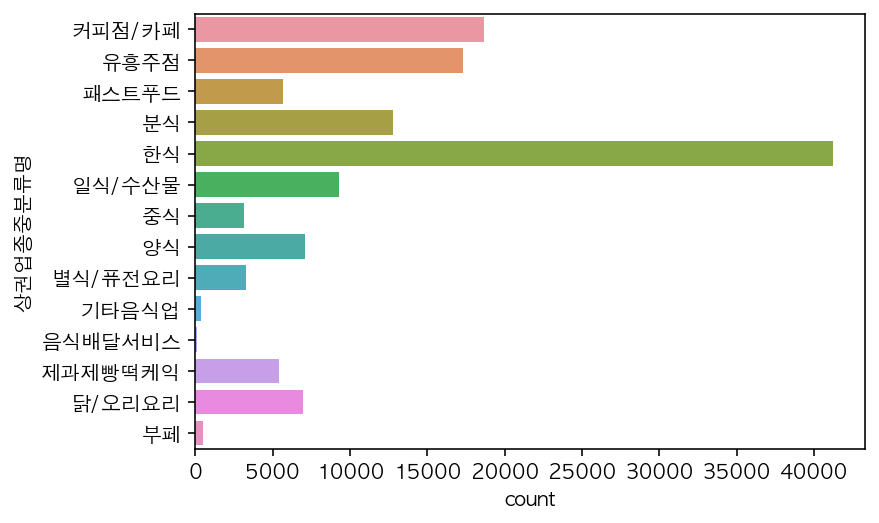

In [36]:
# x, y축을 바꿔서 그리게 되면 위에서 글씨가 겹쳐 보이는 것을 보기 좋게 만들 수 있습니다.
sns.countplot(data=df_food, y="상권업종중분류명")

## 특정 업종만 가져오기

In [37]:
# 특정 업종만 가져오고 싶다면 "패스트푸드" 만 보도록 합니다.

df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(5683, 39)

In [38]:
# 해당 데이터에서 특정 컬럼만 가져오고 싶은데 컬럼명이 생각나지 않는다면 컬럼명만 가져와 봅니다.
df_fast_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [39]:
# 상호명을 unique 로 출력해 봅니다.

df_fast_food['상호명'].unique()

array(['석봉토스트', '피자마루', '솔로몬피자', ..., '몬스터피자&펍', '피자뽀끼', '피자레볼루션'],
      dtype=object)

## 스타벅스, 이디야 위치 분석
* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 스타벅스의 영문명은 STARBUCKS, 이디야는 EDIYA 입니다.

In [40]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.

df_seoul['상호명_소문자'] = df_seoul['상호명'].str.lower()

In [41]:
# ediya 를 "상호명_소문자" 컬럼으로 가져옵니다.
df_seoul[df_seoul['상호명_소문자'].str.contains('ediya')].head(1)

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
39498  25579639  EDIYA커피  NaN         Q       음식       Q12   커피점/카페    Q12A01   

          상권업종소분류명 표준산업분류코드  ...   건물명              도로명주소   구우편번호   신우편번호  \
39498  커피전문점/카페/다방   I56220  ...  세화빌딩  서울특별시 강남구 선릉로 661  135010  6099.0   

       동정보  층정보  호정보         경도         위도  상호명_소문자  
39498  NaN    1  NaN  127.04157  37.515581  ediya커피  

[1 rows x 40 columns]

In [42]:
# 상호명에서 스타벅스만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명'].shape

(502,)

In [43]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'), '상호명'].shape

(502,)

In [44]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|ediya'), '상호명'].shape

(501,)

In [45]:
df_cafe = df_seoul[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks|이디야|ediya')]
df_cafe.shape

(1003, 40)

In [46]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'), '브랜드명'] = '스타벅스'

In [47]:
# ~은 not을 의미합니다. 스타벅스가 아닌 데이터는 이디야로 넣어주어도 되지만
# 아래 코드처럼 결측치를 이디야로 채워줘도 괜찮습니다.
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks'), '브랜드명'] = '이디야'

In [48]:
# 스타벅스를 제외한 데이터는 이디야이기 때문에 이디야로 브랜드명을 만듭니다.
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [49]:
# 브랜드명이 없는 데이터가 있는지 봅니다.
# 위에서 브랜드명을 이디야로 채워줬기 때문에 브랜드명이 모두 잘 채워졌는지 확인합니다.
# 확인을 위한 방법으로 isnull() 혹은 isna()를 사용합니다.
# isnull() 로 결측치 여부를 확인하면 True, False 로 표시가 됩니다.
# True == 1, False == 0 과 같기 때문에 이 값을 다 더하면 결측치의 수가 됩니다.
df_cafe['브랜드명'].isnull().sum()

0

In [50]:
# 혹시 채워지지 않은 값이 있다면 어떤 상호인지 확인하기 위해 결괏값에서 '상호명'만 가져오도록 합니다.
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명']

Series([], Name: 상호명, dtype: object)

In [51]:
df_cafe.loc[df_cafe['브랜드명'].isna(), '상호명']

Series([], Name: 상호명, dtype: object)

In [52]:
# 브랜드명이 다 채워졌는지 확인하기 위해 결측치(비어있는 값)이 있는지 확인합니다.
# isna, isnull 로 확인을 할 수 있으며 sum()으로 갯수를 세어볼 수 있습니다.
df_cafe['브랜드명'].isna().sum()

0

In [53]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1219       스타벅스  스타벅스
1676      이디야커피   이디야
1946  스타벅스종로3가점  스타벅스
2840       스타벅스  스타벅스
2886      이디야커피   이디야

In [54]:
df_cafe['브랜드명'].value_counts()

스타벅스    502
이디야     501
Name: 브랜드명, dtype: int64

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

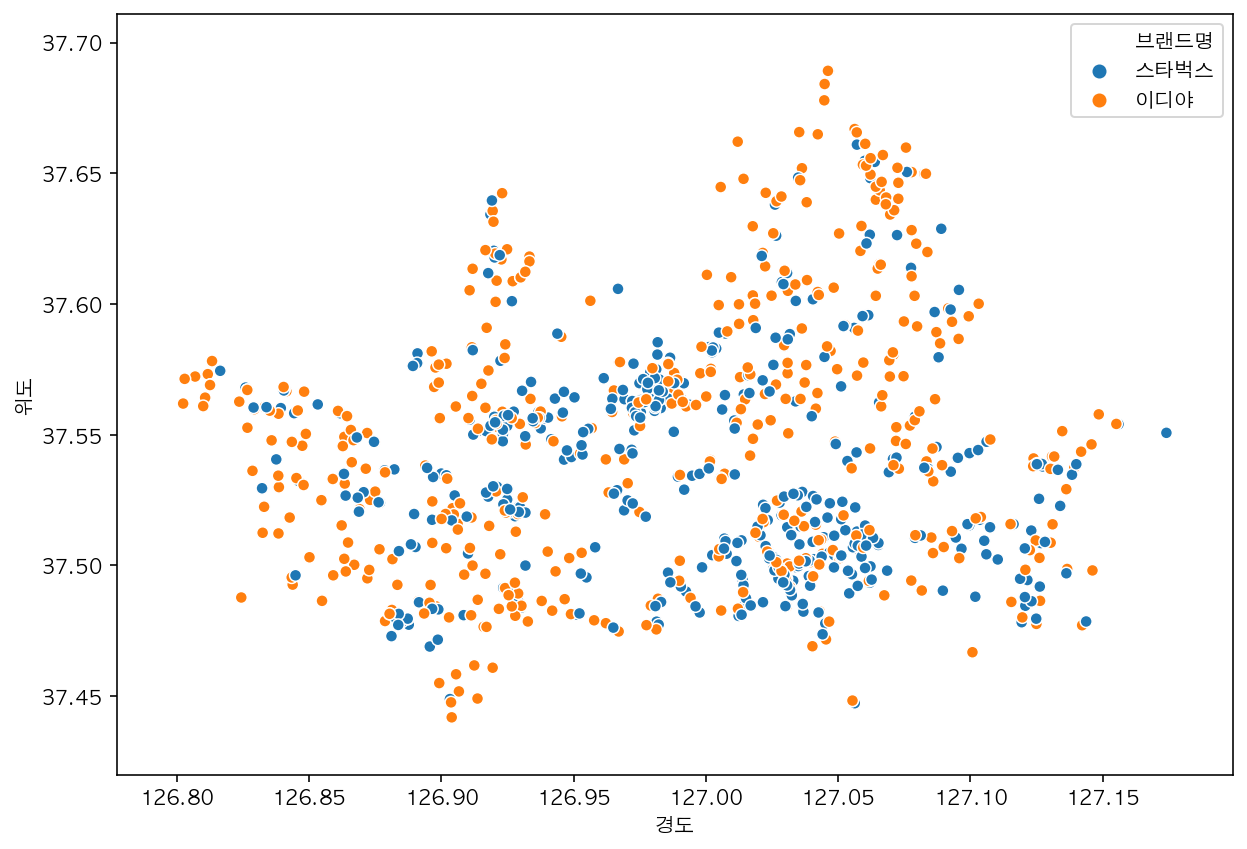

In [55]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

## 구별 브랜드별 점포수

In [56]:
# 구별로 브랜드별 점포수를 구합니다.
# groupby 를 사용하면 구별로 그룹화 해서 점포수를 구할 수 있습니다.
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     128
강동구      25
강북구      16
강서구      58
관악구      32
광진구      30
구로구      33
금천구      24
노원구      43
도봉구      10
동대문구     27
동작구      19
마포구      52
서대문구     32
서초구      67
성동구      23
성북구      35
송파구      55
양천구      28
영등포구     58
용산구      31
은평구      31
종로구      50
중구       79
중랑구      17
Name: 상호명, dtype: int64

In [57]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

## 막대그래프로 시각화 하기

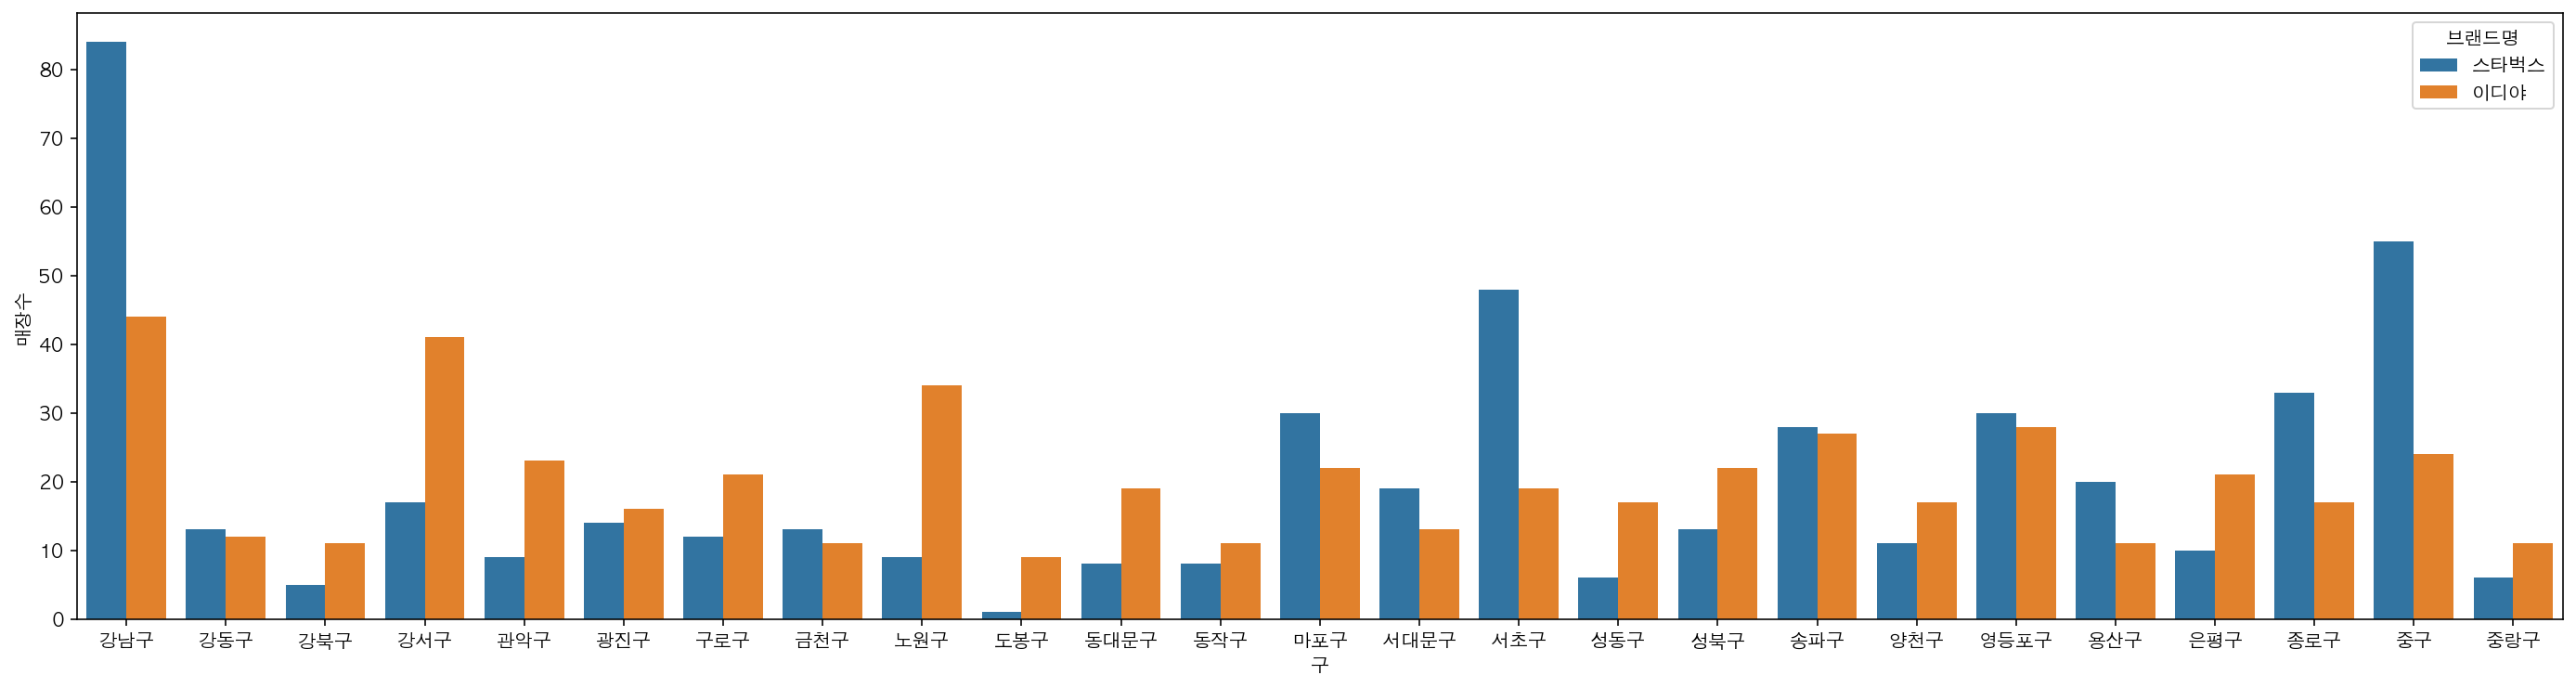

In [58]:
plt.figure(figsize=(24, 6))
sns.barplot(data=df_cafe_brand, x='구', y='매장수', hue='브랜드명')

## 브랜드, 구별 매장수

In [59]:
# groupby 를 통해 "시군구명"으로 그룹화를 하고 "상호명"의 갯수를 세어봅니다.
# 갯수를 셀때는 count를 사용합니다.
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

상호명
시군구명     
강남구   128
강동구    25
강북구    16
강서구    58
관악구    32

In [60]:
# pivot_table 을 이용해서 구별 스타벅스, 이디야 매장수를 구합니다.
df_cafe_brand_gu = df_cafe.pivot_table(index="시군구명", 
                                       columns="브랜드명", 
                                       values="상호명", 
                                       aggfunc="count")
df_cafe_brand_gu.head()

브랜드명  스타벅스  이디야
시군구명           
강남구     84   44
강동구     13   12
강북구      5   11
강서구     17   41
관악구      9   23

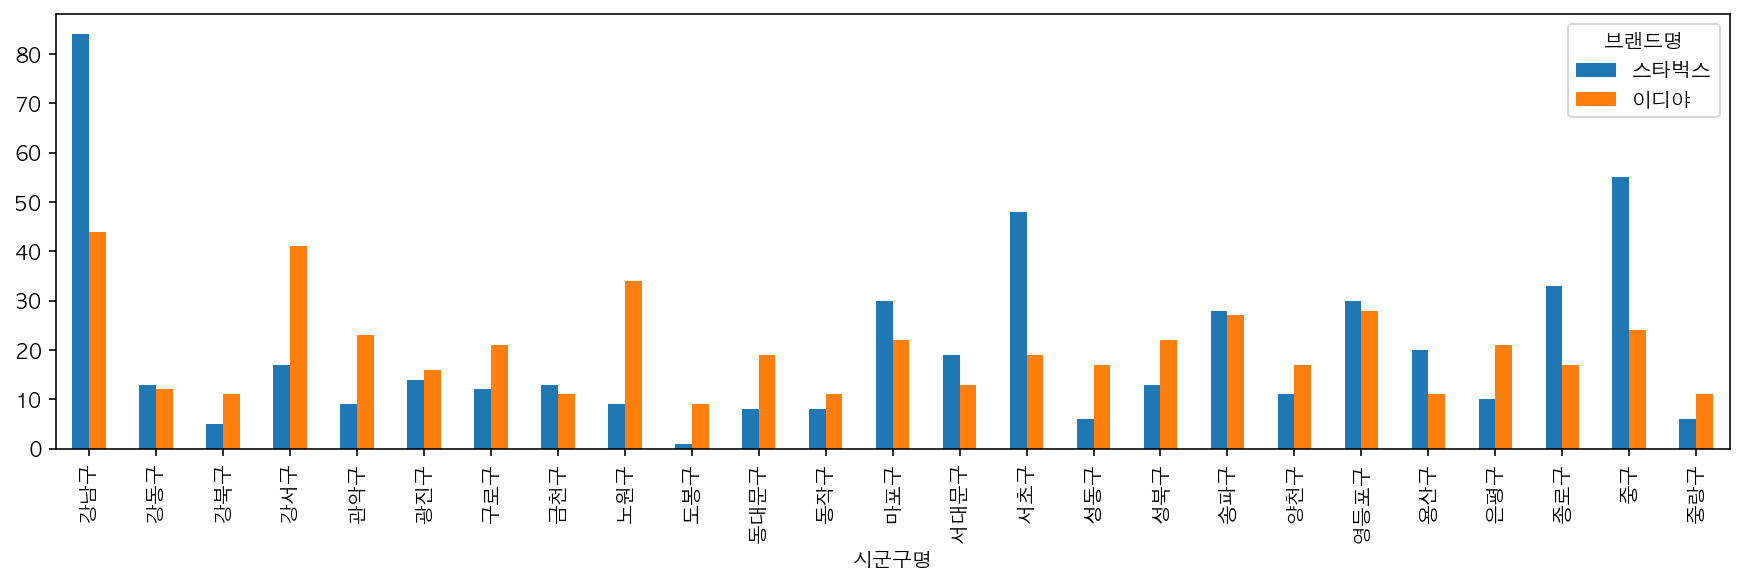

In [61]:
# 판다스의 장점 중 하나는 위에서처럼 구한 pivot_table을 시각화 해보기 쉽습니다.
# pivot_table 로 구한 결과를 plot.bar()를 통해 시각화 합니다.
df_cafe_brand_gu.plot.bar(figsize=(15, 4))

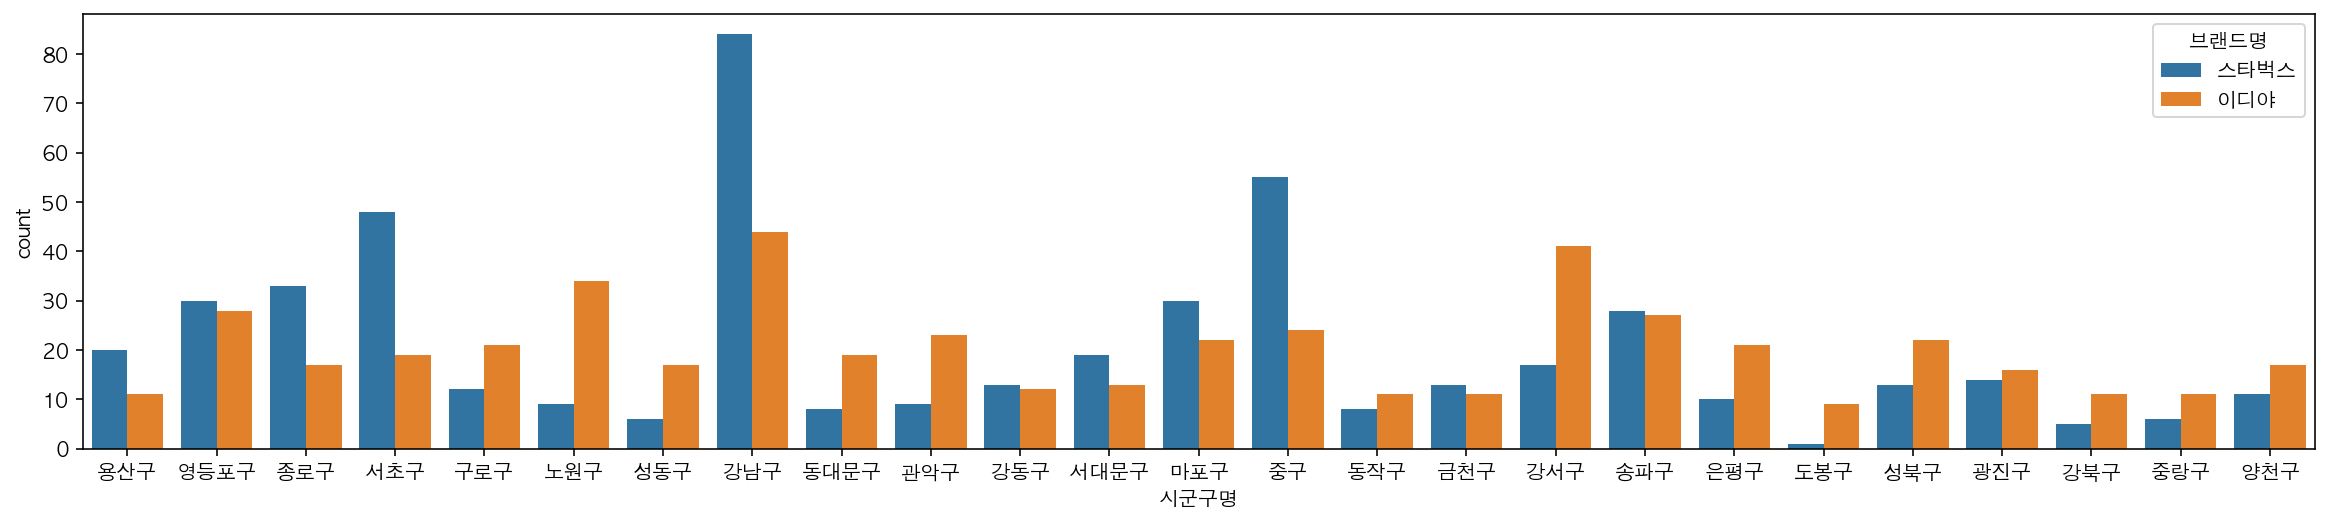

In [62]:
# Pandas 로 시각화를 하는 방법도 있지만 seaborn의 countplot을 사용하면 해당 컬럼의 수를 계산해서 시각화를 해줍니다.
# hue 옵션을 사용하게 되면 값에 따라 다른 색상으로 그리게 됩니다. 
# hue 옵션을 사용할 때는 2~3개 정도의 카테고리 형태의 데이터를 사용하는 것이 적합합니다.
# 여기에서는 브랜드명에 따라 다른 색상으로 표시할 수 있도록 합니다.
plt.figure(figsize=(20, 4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

## Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

In [63]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

In [64]:
geo_df = df_cafe

In [65]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
    # --> folium.vector_layer.CircleMarker 를 사용합니다.
    folium.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## choropleth 그리기

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)
    * 이 링크에서도 다운로드가 가능합니다. https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

In [66]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일입니다. 
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현합니다.
import json

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

### 스타벅스 이디야 카페 매장 합계 분포

In [84]:
df_cafe_gu

상호명
시군구명     
강남구   128
강동구    25
강북구    16
강서구    58
관악구    32
광진구    30
구로구    33
금천구    24
노원구    43
도봉구    10
동대문구   27
동작구    19
마포구    52
서대문구   32
서초구    67
성동구    23
성북구    35
송파구    55
양천구    28
영등포구   58
용산구    31
은평구    31
종로구    50
중구     79
중랑구    17

In [83]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


map

### 스타벅스 매장 분포

In [68]:
# 스타벅스의 매장 수를 구합니다.
# "브랜드명"컬럼으로 스타벅스만 가져옵니다.
# 또, groupby 를 통해 "시군구명"을 그룹화 해주고 "상호명"으로 count를 해주면 구별 매장수를 구할 수 있습니다.
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    84
강동구    13
강북구     5
강서구    17
관악구     9

In [69]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [70]:
# 이디야의 매장 수를 구합니다.
# "브랜드명"컬럼으로 이디야만 가져옵니다.
# 또, groupby 를 통해 "시군구명"을 그룹화 해주고 "상호명"으로 count를 해주면 구별 매장수를 구할 수 있습니다.
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    44
강동구    12
강북구    11
강서구    41
관악구    23

In [71]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

            
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## 매장수 크기를 반영해 CircleMaker 그리기
### Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [72]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   84
1  강남구   이디야   44
2  강동구  스타벅스   13
3  강동구   이디야   12
4  강북구  스타벅스    5

In [73]:
# 스타벅스 이디야가 컬럼으로 오도록 만듭니다.
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    84   44
강동구    13   12
강북구     5   11
강서구    17   41
관악구     9   23

In [74]:
# 간단한 함수를 사용해서 스타벅스가 이디야보다 매장수가 많을 때 1을 출력하도록 합니다.
def store_count(store):
    if store['스타벅스'] > store['이디야'] :
        return 1
    else:
        return 0

In [75]:
# pandas 의 apply를 사용해서 매장수를 비교하는 함수를 적용해 줍니다.
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply(store_count, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

In [76]:
# 위의 방법을 아래와 같은 람다표현식을 사용해서 구현할 수도 있습니다.
# 한 줄에 간결하게 표현할 수 있지만 아직은 익숙하지 않을 수 있으니 위에 방법을 먼저 해보시는 걸 추천합니다.
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    84   44      1
강동구    13   12      1
강북구     5   11      0
강서구    17   41      0
관악구     9   23      0

In [77]:
# 구별로 CircleMarker를 표현하기 위해서는 각 구의 위경도 값을 구해야 합니다.
# 구별 위도와 경도를 가져와 평균 값을 구해서 사용합니다.
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    84   44      1  37.506152  127.045159
강동구    13   12      1  37.540512  127.135966
강북구     5   11      0  37.632224  127.022390
강서구    17   41      0  37.556381  126.837973
관악구     9   23      0  37.481693  126.935638

In [78]:
# CircleMarker의 radius 지정시 다음과 같은 타입오류가 나서 float type 으로 변경합니다.
# TypeError: Object of type 'int64' is not JSON serializable

df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [79]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_brand_vs['매장수비교'],
               columns = [df_cafe_brand_vs.index, 
                          df_cafe_brand_vs['매장수비교']],
               fill_color = 'BuGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        
        # folium.CircleMarker 혹은 folium.features.CircleMarker 오류가 날 경우
        # --> folium.vector_layer.CircleMarker 를 사용합니다.
        folium.CircleMarker(
            location = [df_cafe_brand_vs.loc[gu,'위도'], 
                      df_cafe_brand_vs.loc[gu, '경도']],
            radius = cafe_count,
            color = icon_color,
            popup = msg,
            fill = True,
            fill_color = icon_color
        ).add_to(map)

map

#### 지도 출력 시 색상 참고
* http://colorbrewer2.org/

## folium 공부를 위해 더 읽어보면 좋을 것 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
* [PinkWink의 데이터 사이언스 관련 책 - 파이썬으로 데이터 주무르기](https://pinkwink.kr/1070)

## 카토그램 
* [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
* [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)